# Part 6: Risk-Return Analysis & Conclusions

This notebook handles:
- Creating risk-return scatter plots
- Identifying optimal investment opportunities
- Summarizing key findings and conclusions


## 6.1 Setup


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.patches import Patch

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

pd.set_option('display.float_format', '{:.4f}'.format)

✓ Libraries imported successfully!


## 6.2 Load Data


In [ ]:
%store -r annualized_returns
%store -r annualized_volatility
%store -r sharpe_ratio
%store -r metrics_df
%store -r tech_stocks
%store -r finance_stocks
%store -r all_tickers

if 'annualized_returns' not in locals():
    processed_dir = Path.cwd().parent / 'data' / 'processed'
    returns_df = pd.read_csv(processed_dir / 'daily_returns.csv', index_col=0, parse_dates=True)
    tech_stocks = ['AAPL', 'MSFT', 'GOOGL']
    finance_stocks = ['JPM', 'BAC', 'GS']
    all_tickers = tech_stocks + finance_stocks
    
    trading_days = 252
    annualized_returns = returns_df.mean() * trading_days
    annualized_volatility = returns_df.std() * np.sqrt(trading_days)
    sharpe_ratio = annualized_returns / annualized_volatility
    
    metrics_df = pd.DataFrame({
        'Annual Return': annualized_returns,
        'Annual Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    })
    print("✓ Data loaded and metrics calculated from CSV")
else:
    print("✓ Data loaded from previous notebook")

print(f"✓ Metrics available for {len(all_tickers)} stocks")


✓ Data loaded from previous notebook
✓ Metrics available for 6 stocks


## 6.3 Risk-Return Scatter Plot


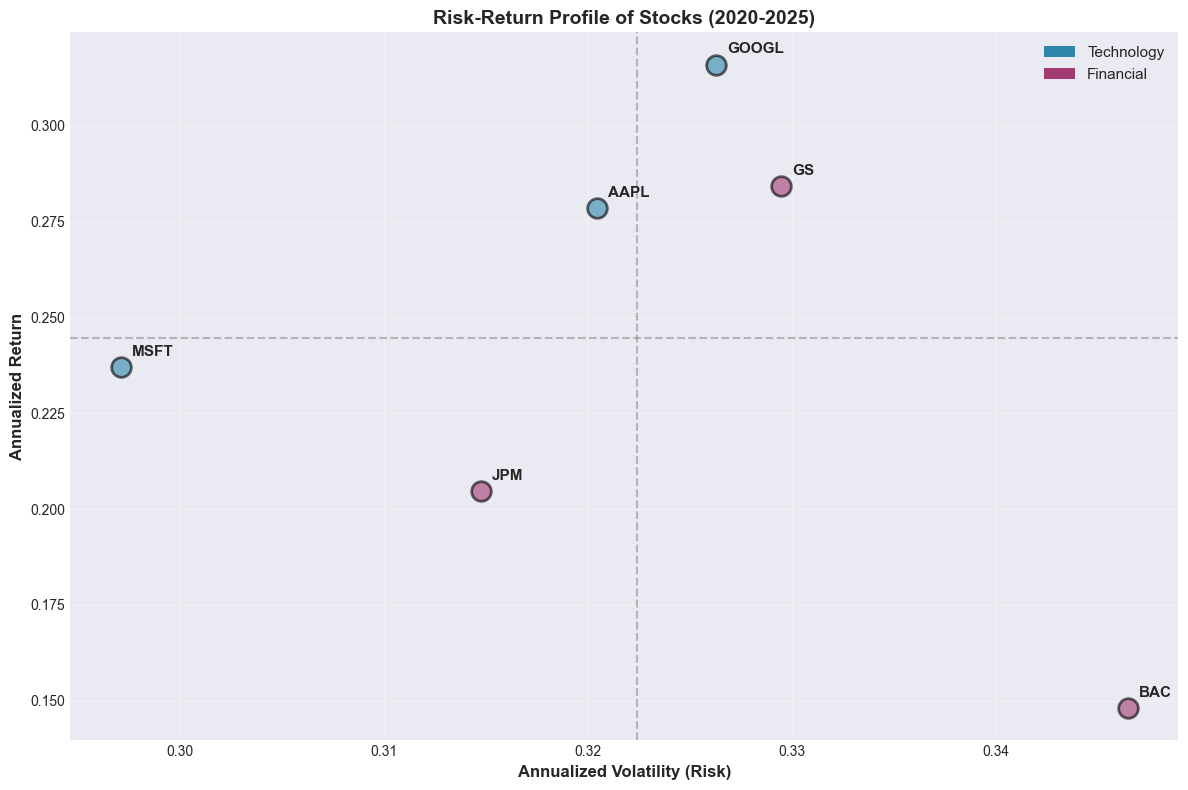

✓ Risk-return scatter plot created
✓ Top-right quadrant: High return, high risk (growth stocks)
✓ Top-left quadrant: High return, low risk (ideal investments)
✓ Bottom-right quadrant: Low return, high risk (avoid)
✓ Bottom-left quadrant: Low return, low risk (conservative)


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'Tech': '#2E86AB', 'Finance': '#A23B72'}
sector_map = {ticker: 'Tech' if ticker in tech_stocks else 'Finance' for ticker in all_tickers}

for ticker in all_tickers:
    color = colors[sector_map[ticker]]
    ax.scatter(annualized_volatility[ticker], annualized_returns[ticker], 
              s=200, alpha=0.6, color=color, edgecolors='black', linewidth=2)
    ax.annotate(ticker, (annualized_volatility[ticker], annualized_returns[ticker]),
               xytext=(8, 8), textcoords='offset points', fontsize=11, fontweight='bold')

ax.axhline(y=annualized_returns.mean(), color='gray', linestyle='--', alpha=0.5, label='Mean Return')
ax.axvline(x=annualized_volatility.mean(), color='gray', linestyle='--', alpha=0.5, label='Mean Volatility')

ax.set_xlabel('Annualized Volatility (Risk)', fontsize=12, fontweight='bold')
ax.set_ylabel('Annualized Return', fontsize=12, fontweight='bold')
ax.set_title('Risk-Return Profile of Stocks (2020-2025)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

legend_elements = [Patch(facecolor=colors['Tech'], label='Technology'),
                  Patch(facecolor=colors['Finance'], label='Financial')]
ax.legend(handles=legend_elements, loc='best', fontsize=11)

plt.tight_layout()
plt.show()



## 6.4 Identify Best Performers


In [ ]:
print("Top Performers by Different Metrics")
print("\n1. Best Risk-Adjusted Returns (Sharpe Ratio):")
top_sharpe = metrics_df.sort_values('Sharpe Ratio', ascending=False)
for i, (ticker, row) in enumerate(top_sharpe.iterrows(), 1):
    sector = "Tech" if ticker in tech_stocks else "Finance"
    print(f"   {i}. {ticker:6s} ({sector:7s}): {row['Sharpe Ratio']:.4f}")

print("\n2. Highest Returns:")
top_returns = metrics_df.sort_values('Annual Return', ascending=False)
for i, (ticker, row) in enumerate(top_returns.iterrows(), 1):
    sector = "Tech" if ticker in tech_stocks else "Finance"
    print(f"   {i}. {ticker:6s} ({sector:7s}): {row['Annual Return']:+7.2%}")

print("\n3. Lowest Volatility (Most Stable):")
low_vol = metrics_df.sort_values('Annual Volatility')
for i, (ticker, row) in enumerate(low_vol.iterrows(), 1):
    sector = "Tech" if ticker in tech_stocks else "Finance"
    print(f"   {i}. {ticker:6s} ({sector:7s}): {row['Annual Volatility']:7.2%}")


Top Performers by Different Metrics

1. Best Risk-Adjusted Returns (Sharpe Ratio):
   1. GOOGL  (Tech   ): 0.9686
   2. AAPL   (Tech   ): 0.8694
   3. GS     (Finance): 0.8632
   4. MSFT   (Tech   ): 0.7977
   5. JPM    (Finance): 0.6503
   6. BAC    (Finance): 0.4273

2. Highest Returns:
   1. GOOGL  (Tech   ): +31.60%
   2. GS     (Finance): +28.44%
   3. AAPL   (Tech   ): +27.86%
   4. MSFT   (Tech   ): +23.70%
   5. JPM    (Finance): +20.47%
   6. BAC    (Finance): +14.80%

3. Lowest Volatility (Most Stable):
   1. MSFT   (Tech   ):  29.71%
   2. JPM    (Finance):  31.48%
   3. AAPL   (Tech   ):  32.04%
   4. GOOGL  (Tech   ):  32.63%
   5. GS     (Finance):  32.95%
   6. BAC    (Finance):  34.65%


## 6.5 Save Risk-Return Chart


✓ Risk-return chart saved to /Users/mkgp3/WebstormProjects/Market Pulse Python Project/data/processed/risk_return.png


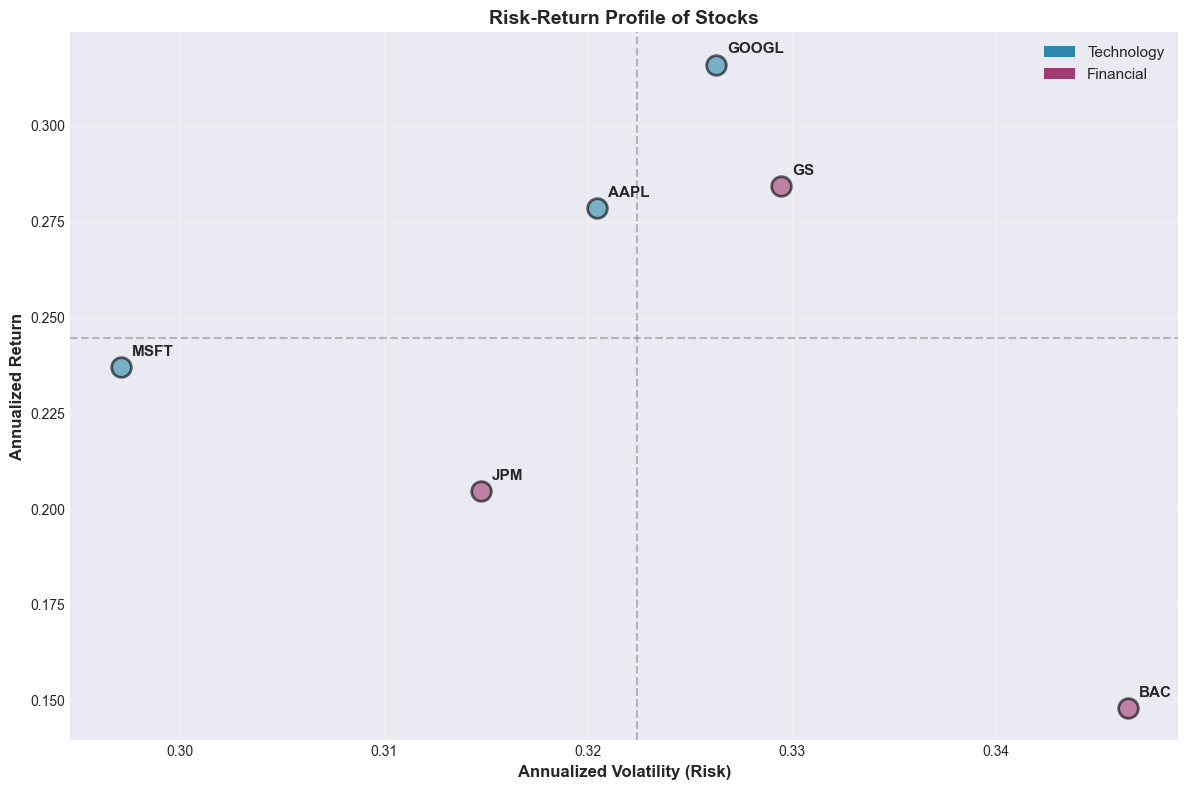

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'Tech': '#2E86AB', 'Finance': '#A23B72'}
sector_map = {ticker: 'Tech' if ticker in tech_stocks else 'Finance' for ticker in all_tickers}

for ticker in all_tickers:
    color = colors[sector_map[ticker]]
    ax.scatter(annualized_volatility[ticker], annualized_returns[ticker], 
              s=200, alpha=0.6, color=color, edgecolors='black', linewidth=2)
    ax.annotate(ticker, (annualized_volatility[ticker], annualized_returns[ticker]),
               xytext=(8, 8), textcoords='offset points', fontsize=11, fontweight='bold')

ax.axhline(y=annualized_returns.mean(), color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=annualized_volatility.mean(), color='gray', linestyle='--', alpha=0.5)

ax.set_xlabel('Annualized Volatility (Risk)', fontsize=12, fontweight='bold')
ax.set_ylabel('Annualized Return', fontsize=12, fontweight='bold')
ax.set_title('Risk-Return Profile of Stocks', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

legend_elements = [Patch(facecolor=colors['Tech'], label='Technology'),
                  Patch(facecolor=colors['Finance'], label='Financial')]
ax.legend(handles=legend_elements, loc='best', fontsize=11)

plt.tight_layout()

output_dir = Path.cwd().parent / 'data' / 'processed'
output_path = output_dir / 'risk_return.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
